## Decision Trees

### Uma árvore de decisão em modelos de regressão é uma técnica de aprendizado de máquina que utiliza uma estrutura de árvore para representar um conjunto de decisões e suas consequências. Aqui está uma explicação detalhada do funcionamento:

### 1 - **Estrutura da Árvore**:

#### A árvore de decisão é uma estrutura hierárquica composta por nós (ou vértices) e arestas (ou ramificações). O nó superior é chamado de nó raiz, que representa a variável que melhor divide o conjunto de dados com base em algum critério de divisão.

### 2 - **Divisão dos Dados**:

#### Em cada nó da árvore, os dados são divididos com base em uma condição sobre uma variável preditora. Por exemplo, em um problema de regressão, o algoritmo pode decidir dividir os dados com base no valor de uma variável, como a média de idade, utilizando uma condição como idade <= 30.

### 3 - **Critério de Divisão**:

#### O critério de divisão em árvores de decisão de regressão frequentemente envolve a minimização do erro residual após a divisão. O algoritmo busca a divisão que resulta na maior redução do erro de predição em comparação com o erro na divisão anterior.

### 4 - **Construção da Árvore**:

#### A árvore é construída recursivamente, dividindo-se o conjunto de dados em subconjuntos menores em cada nível da árvore, até que sejam alcançadas condições de parada predefinidas, como um número máximo de nós na árvore ou uma profundidade máxima.

### 5 - **Nós Terminais (Folhas)**:

#### Os nós terminais da árvore (folhas) contêm os valores de saída (ou previsão) para os subconjuntos de dados correspondentes. Em problemas de regressão, isso geralmente é a média dos valores de saída dos exemplos de treinamento que caem naquela folha.

### 6 - **Predição**:

#### Para fazer uma previsão para um novo exemplo, o algoritmo percorre a árvore de decisão com base nas condições de divisão até chegar a uma folha. O valor de saída previsto para esse exemplo é o valor armazenado na folha correspondente.

----------------------------------------------------------------------------------------------------------------------------------------------------------

### Para treinar um modelo de Árvore de Decisão, como exemplo, para realizar uma regressão na coluna 'PROF_MATEMATICA', podemos seguir os seguintes passos utilizando a biblioteca scikit-learn em Python:

----------------------------------------------------------------------------------------------------------------------

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset
gnetDf = pd.read_csv('datasets/SPAECE_2018_codificado.csv')


In [3]:
# Dividir as features e o target
features = ['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI', 'ACESSO A INTERNET', 
            'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS', 'CURSO O ENSINO FUNDAMENTAL', 
            'REPROVOU', 'ABANDONOU A ESCOLA', 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE', 
            'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES', 'TURNO ESCOLAR', 
            'NUMERO DE PONTOS EM PORTUGUES','PROFICIENCIA EM PORTUGUES']

# Retirado 'NUMERO DE PONTOS EM MATEMATICA' por conta do viés com a coluna target 

In [4]:
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,252.90,285.73
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,281.74,306.30
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,224.17,243.40
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,281.61,268.13
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,301.68,240.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,275.88,259.11
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,335.27,304.96
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,334.70,251.84
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,323.70,261.49


----------------------------------------------------------------------------------------------------------------------

In [5]:
X = gnetDf[features]
y = gnetDf['PROFICIENCIA EM MATEMATICA']

In [6]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Treinar o modelo de árvore de decisão
model = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=2, max_depth=1000) # Ajuste de Hiperparâmetros
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1000, min_samples_leaf=2, min_samples_split=5)

In [8]:
# Fazer previsões
y_pred = model.predict(X_test)

---------------------------------------------------------------------------------------------------------------------

In [9]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [10]:
# Exibir as métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 3157.4580731231017
Root Mean Squared Error (RMSE): 56.19126331666785
Mean Absolute Error (MAE): 43.69148839572023
Mean Absolute Percentage Error (MAPE): 16.037748405905717
R² Score: -0.13253528576927476


#### Um valor negativo para o coeficiente de determinação $𝑅^2$ indica que o modelo está performando pior do que um modelo que simplesmente prediz a média dos valores de saída. Isso pode acontecer quando o modelo SVM não consegue capturar a variação dos dados ou quando há um ajuste pior do que o esperado.

---------------------------------------------------------------------------------------------------------------

### Usamos LinearRegression do scikit-learn para ajustar uma linha de regressão aos valores reais e previstos Calculamos o coeficiente angular (slope) e a interceptação (intercept) da linha de regressão.

In [11]:
# Ajustar uma linha de regressão linear para os dados previstos vs reais
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)

# Coeficientes da linha de regressão
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Gerar pontos para a linha de regressão
x_line = np.linspace(y_test.min(), y_test.max(), 100)
y_line = slope * x_line + intercept

### Geramos pontos para a linha de regressão com base nos valores mínimos e máximos de y_test. Plotamos esta linha junto com a linha y = x e os pontos reais vs previstos.

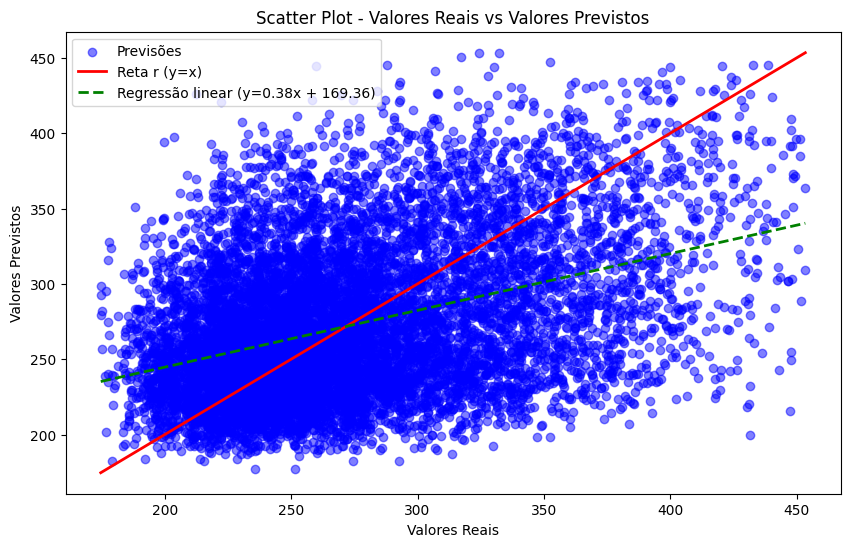

In [12]:
# Gráfico Scatter Plot Valores Reais x Valores Previstos com a reta r
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta r (y=x)')
plt.plot(x_line, y_line, color='green', lw=2, linestyle='--', label=f'Regressão linear (y={slope:.2f}x + {intercept:.2f})')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Scatter Plot - Valores Reais vs Valores Previstos')
plt.legend()
plt.show()

### Scatter Plot que mostra os valores reais versus os valores previstos, a linha de perfeita correspondência y = x, e a linha de regressão linear que melhor se ajusta aos dados. A equação da linha de regressão será exibida na legenda do gráfico.

----------------------------------------------------------------------------------------------------------------------

#### Adicionamos uma seção para visualizar a árvore de decisão. A função plot_tree gera uma visualização da árvore treinada, mostrando como as decisões são tomadas em cada nó. Usamos os parâmetros feature_names para exibir os nomes das features e filled=True para colorir os nós de acordo com a pureza.

#### Ajustamos o tamanho do gráfico (figsize=(20, 10)), mas como são muitas folhas e a profundidade muito alta é impossível visualizar a árvore por inteiro.

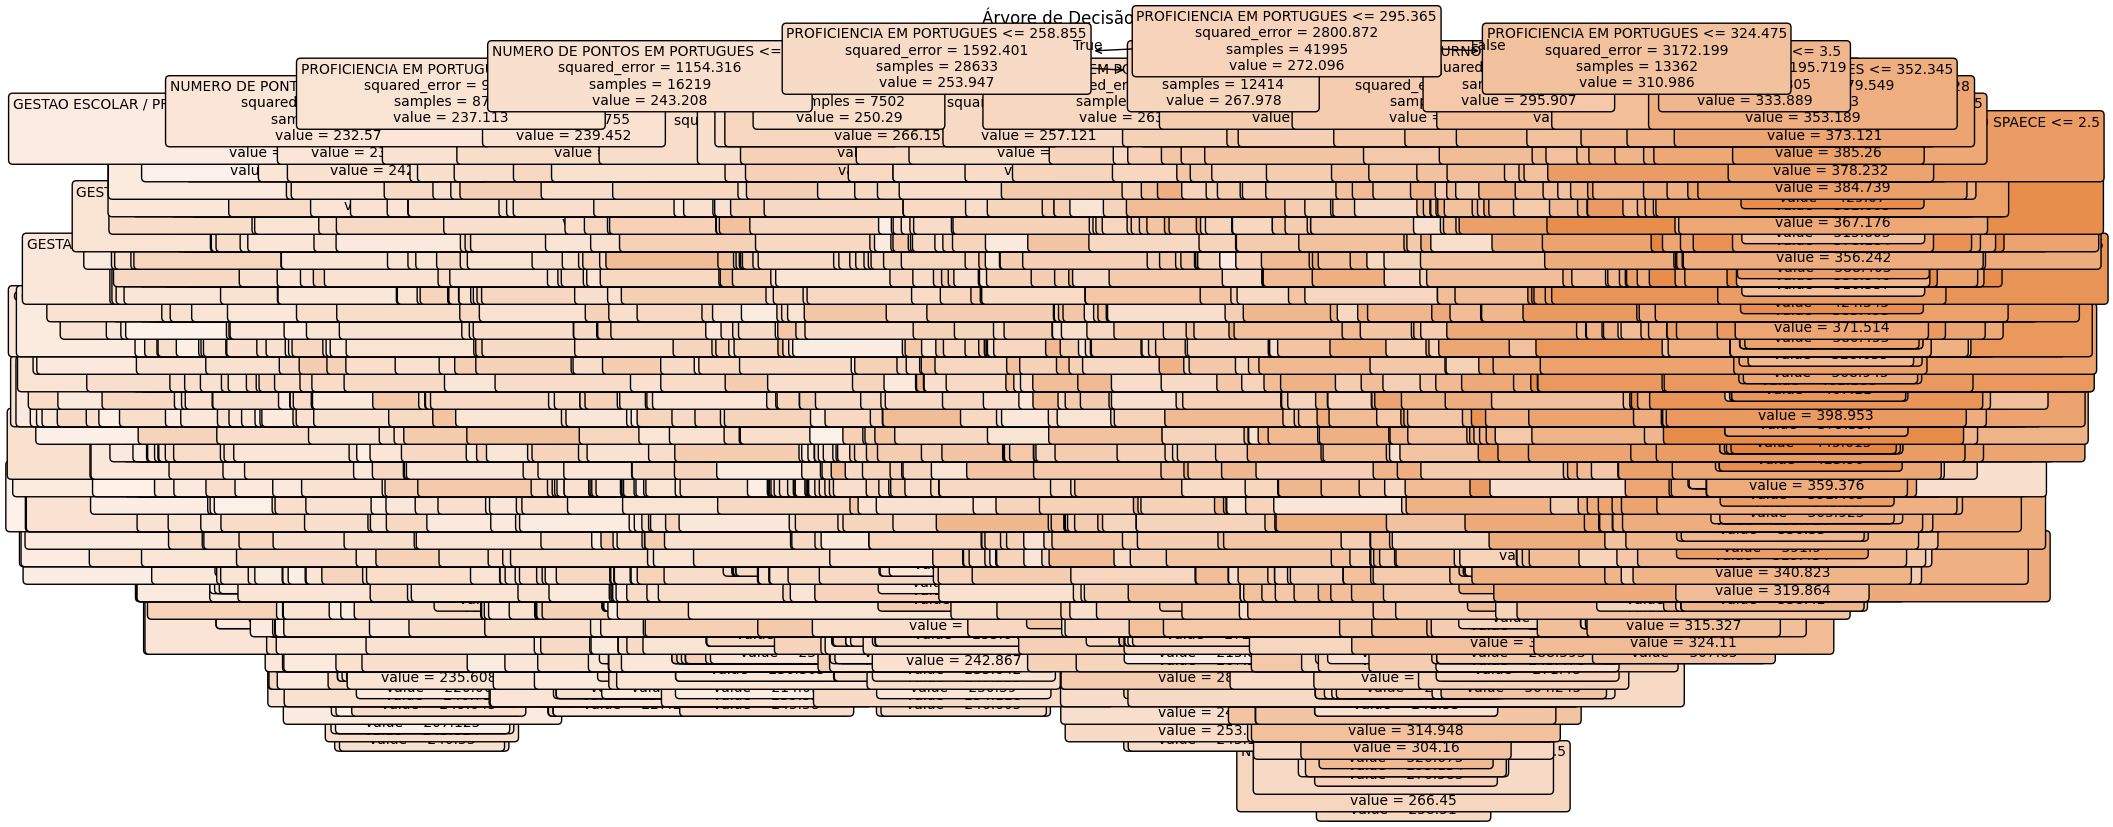

In [13]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão')
plt.show()